In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv('ecommerce_product_dataset.csv')

In [3]:
df['DateAdded'] = pd.to_datetime(df['DateAdded'])

# Sales and Prizes Analysis

Q1 : What is the relationship between the price of a product and its sales?

In [4]:
# Compute correlation using numpy
correlation = df['Price'].corr(df['Sales'])
print("Correlation :", correlation)

Correlation : 0.029076056224528687


Ans: A correlation coefficient is very close to 0, indicating that there is almost no linear relationship between Price and
Sales. This means that changes in one variable do not predict changes in the other variable.

Q2: How do discounts impact the sales of products?

In [5]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08


In [6]:
df['Discount'].corr(df['Sales'])

0.027413469870457507

Ans: The correlation between discount and sales is weak, suggesting that discounts alone do not significantly impact sales.

Q3: Analyze Discount Effectiveness by Discount Ranges?

In [7]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08


In [8]:
df['Discount'].unique()

array([0.08, 0.33, 0.31, 0.49, 0.23, 0.48, 0.25, 0.1 , 0.45, 0.16, 0.27,
       0.2 , 0.3 , 0.05, 0.28, 0.13, 0.24, 0.4 , 0.41, 0.35, 0.5 , 0.07,
       0.18, 0.43, 0.47, 0.17, 0.  , 0.01, 0.15, 0.19, 0.29, 0.44, 0.32,
       0.04, 0.26, 0.09, 0.34, 0.14, 0.38, 0.39, 0.37, 0.11, 0.02, 0.03,
       0.12, 0.21, 0.06, 0.42, 0.46, 0.36, 0.22])

In [9]:
discount_bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
discount_labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%']
df['DiscountRange'] = pd.cut(df['Discount'], bins=discount_bins, labels=discount_labels)

In [10]:
# Calculate average sales for each discount range
average_sales_by_discount = df.groupby('DiscountRange')['Sales'].mean().reset_index()

In [11]:
average_sales_by_discount

,DiscountRange,Sales
0,0-10%,970.509804
1,10-20%,994.525773
2,20-30%,1070.273585
3,30-40%,1010.840909
4,40-50%,1013.483092


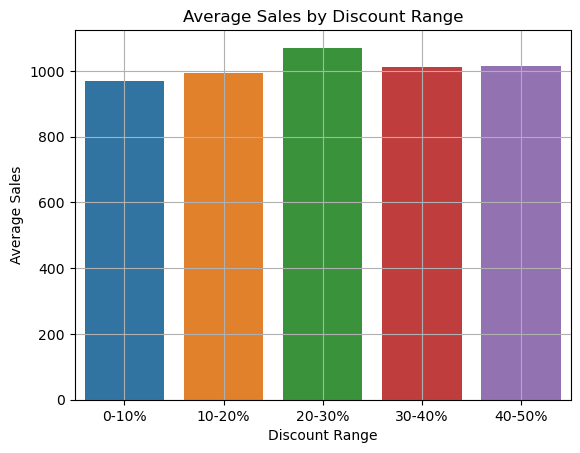

In [12]:
# visualizing
sns.barplot(data = average_sales_by_discount, x = 'DiscountRange', y = 'Sales')
plt.title('Average Sales by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()

Ans: As we can see above plot Providing 20-30% Discount increasing more sales volumne.

Q4: Which price range has the highest sales volume?

In [13]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,DiscountRange
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08,0-10%
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26,30-40%
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18,30-40%
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03,40-50%
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08,20-30%


In [14]:
# Creating Price_range column
conditions = [
    
    (df['Price'] >= 10) & (df['Price'] < 50),
    (df['Price'] >= 50) & (df['Price'] < 100),
    (df['Price'] >= 100) & (df['Price'] < 150),
    (df['Price'] >= 150) & (df['Price'] < 200),
    (df['Price'] >= 200) & (df['Price'] < 250),
    (df['Price'] >= 250) & (df['Price'] < 300),
    (df['Price'] >= 300) & (df['Price'] < 350),
    (df['Price'] >= 350) & (df['Price'] < 400),
    (df['Price'] >= 400) & (df['Price'] < 450),
    (df['Price'] >= 450) & (df['Price'] < 500)
]
choices = ['10-50','50-100','100-150','150-200','200-250','250-300','300-350','350-400','400-450','450-500']
df['Price_range'] = np.select(conditions,choices, default = 'other')

In [149]:
sales_by_price = df.groupby('Price_range')['Sales'].mean().sort_values(ascending = False).reset_index()

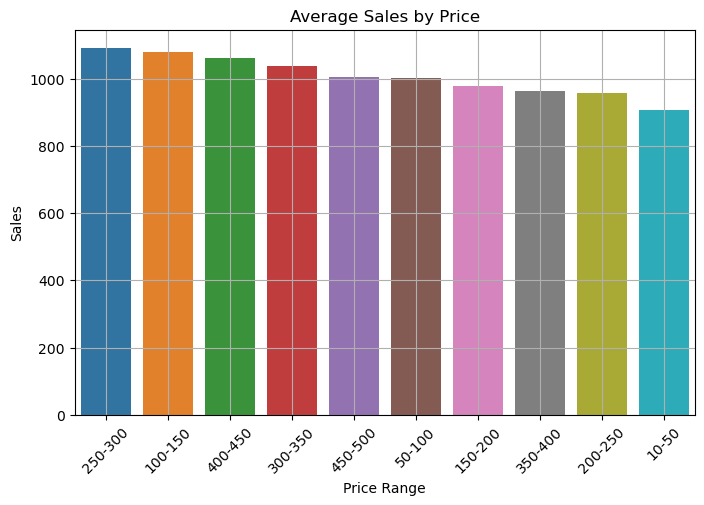

In [152]:
plt.figure(figsize=(8,5))
sns.barplot(data = sales_by_price, x = 'Price_range', y = 'Sales')
plt.title('Average Sales by Price')
plt.xlabel('Price Range')
plt.ylabel('Sales')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

As we can see above plot prize range b/w 250 - 300 has the highest sales volume.

# Category Performance Analysis

Q5: Which product category generates the most revenue?

In [16]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,DiscountRange,Price_range
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08,0-10%,400-450
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26,30-40%,200-250
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18,30-40%,400-450
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03,40-50%,150-200
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08,20-30%,350-400


In [17]:
df['Revenue'] = df['Price'] * df['Sales'] # adding revenue column

In [18]:
top_category = df.groupby('Category')['Revenue'].sum().sort_values(ascending = False).reset_index().head(10)

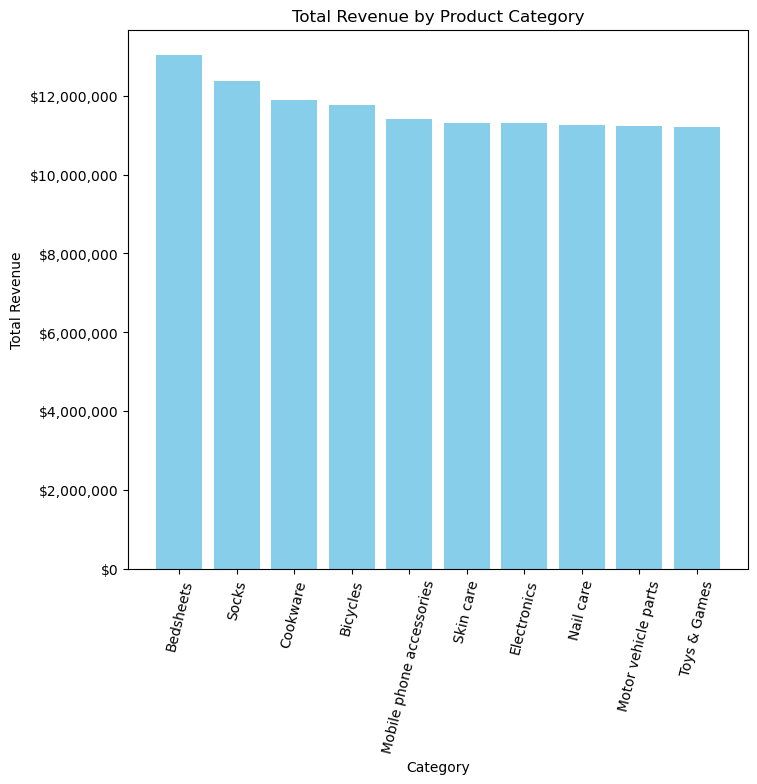

In [19]:
plt.figure(figsize = (8,7))
plt.bar(top_category['Category'], top_category['Revenue'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Category')
plt.xticks(rotation=76)
formatter = mtick.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

Q5: How does the average rating vary across different product categories?

In [20]:
avg_rating_by_category = df.groupby('Category')['Rating'].mean().reset_index().sort_values(by = 'Rating',ascending = False)

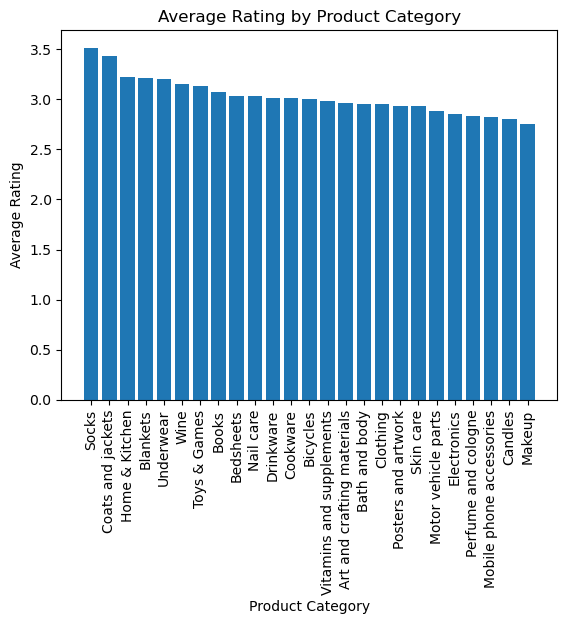

In [21]:
plt.bar(avg_rating_by_category['Category'], avg_rating_by_category['Rating'])
plt.xlabel('Product Category')
plt.ylabel('Average Rating')
plt.title('Average Rating by Product Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

Q6: Which category has the highest average discount?

In [22]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,DiscountRange,Price_range,Revenue
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08,0-10%,400-450,186544.46
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26,30-40%,200-250,313059.96
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18,30-40%,400-450,105310.80
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03,40-50%,150-200,275776.20
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08,20-30%,350-400,595267.92


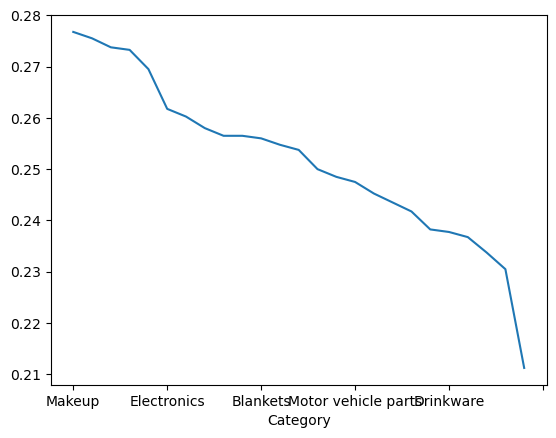

In [23]:
df.groupby('Category')['Discount'].mean().sort_values(ascending = False).plot(kind = 'line')
plt.show()

Ans: Makeup has the highest average discount around 27.65 %

# Customer Reviews and Ratings

Q7: is there a correlation between the number of reviews and the rating of a product?

In [24]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,DiscountRange,Price_range,Revenue
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08,0-10%,400-450,186544.46
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26,30-40%,200-250,313059.96
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18,30-40%,400-450,105310.80
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03,40-50%,150-200,275776.20
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08,20-30%,350-400,595267.92


In [25]:
df['NumReviews'].corr(df['Rating'])

-0.009832483346722464

Ans: It is very close to 0. Hence there is no correlation

Q8: Do higher-rated products have significantly more sales?

In [26]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,DiscountRange,Price_range,Revenue
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08,0-10%,400-450,186544.46
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26,30-40%,200-250,313059.96
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18,30-40%,400-450,105310.80
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03,40-50%,150-200,275776.20
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08,20-30%,350-400,595267.92


In [27]:
df['Rating'].corr(df['Sales'])

0.008475382887570293

Ans: It is very close to 0. Hence there is no linear correlation

Q9: What is the distribution of ratings across all products?

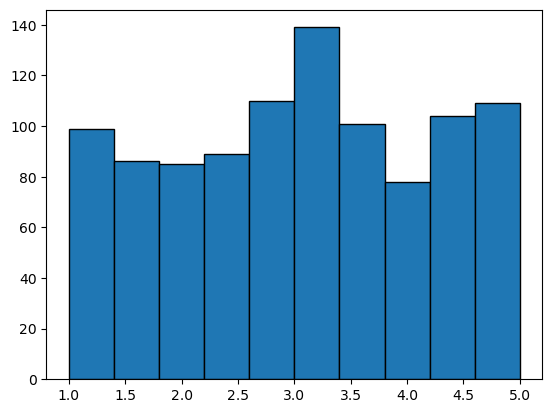

In [28]:
plt.hist(df['Rating'], bins=10, edgecolor='black')
plt.show()

Ans: Products rated between 3.0 and 3.5 are often seen as average. They meet basic expectations but do not exceed them.
Consistency: A high concentration of ratings in this range might indicate consistency in product quality, but not necessarily high quality.

# Stock and Inventory Analysis

Q10: Are there any products with high stock but low sales? What are the potential reasons?

In [29]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,DiscountRange,Price_range,Revenue
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08,0-10%,400-450,186544.46
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26,30-40%,200-250,313059.96
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18,30-40%,400-450,105310.80
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03,40-50%,150-200,275776.20
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08,20-30%,350-400,595267.92


In [30]:
# dentify Products with High Stock and Low Sales
high_stock_threshold = df['StockQuantity'].quantile(0.75)  # Top 25% stock levels
low_sales_threshold = df['StockQuantity'].quantile(0.25)  # Bottom 25%

# Identify products with high stock but low sales
high_stock_low_sales = df[(df['StockQuantity'] > high_stock_threshold) & (df['Sales'] < low_sales_threshold)]
high_stock_low_sales.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,DiscountRange,Price_range,Revenue
75,76,Jeans,Clothing,206.11,2.9,823,928,0.11,133,2024-04-13,10-20%,200-250,27412.63
83,84,Coffee Maker,Home & Kitchen,439.56,3.2,1015,800,0.39,145,2023-10-30,30-40%,400-450,63736.20
92,93,Toaster,Home & Kitchen,230.95,4.6,4637,758,0.26,80,2024-01-29,20-30%,200-250,18476.00
125,126,Biography,Books,252.05,4.0,2853,908,0.06,227,2023-11-07,0-10%,250-300,57215.35
229,230,Vitamin D,Vitamins and supplements,226.59,2.3,2891,861,0.07,132,2023-09-08,0-10%,200-250,29909.88


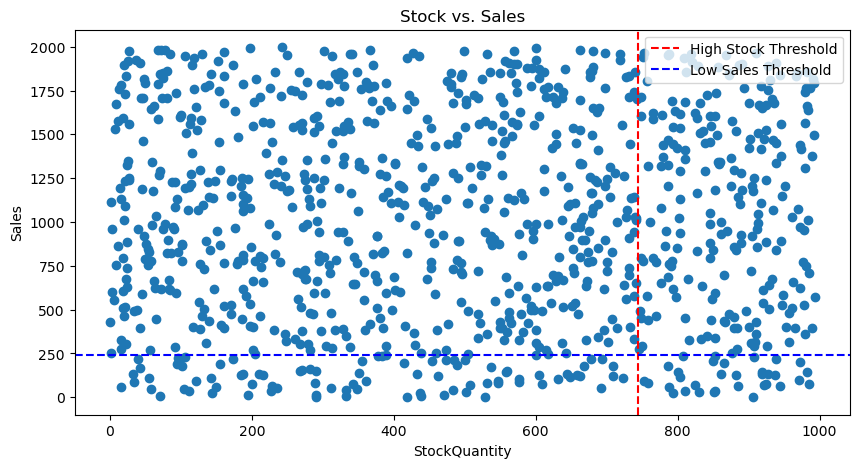

In [31]:
plt.figure(figsize=(10, 5))
plt.scatter(df['StockQuantity'], df['Sales'])
plt.axvline(high_stock_threshold, color='red', linestyle='--', label='High Stock Threshold')
plt.axhline(low_sales_threshold, color='blue', linestyle='--', label='Low Sales Threshold')
plt.xlabel('StockQuantity')
plt.ylabel('Sales')
plt.title('Stock vs. Sales')
plt.legend()
plt.show()

Q11: What is the turnover rate for each product category?

In [32]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,DiscountRange,Price_range,Revenue
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08,0-10%,400-450,186544.46
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26,30-40%,200-250,313059.96
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18,30-40%,400-450,105310.80
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03,40-50%,150-200,275776.20
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08,20-30%,350-400,595267.92


In [33]:
# Calculate turnover rate for each product category using stock
turnover_rate_by_category = df.groupby('Category').apply(lambda x: x['Sales'].sum() / x['StockQuantity'].mean())

In [34]:
tr = turnover_rate_by_category.to_frame('Turn Over Rate').reset_index().sort_values(by='Turn Over Rate', ascending = False)

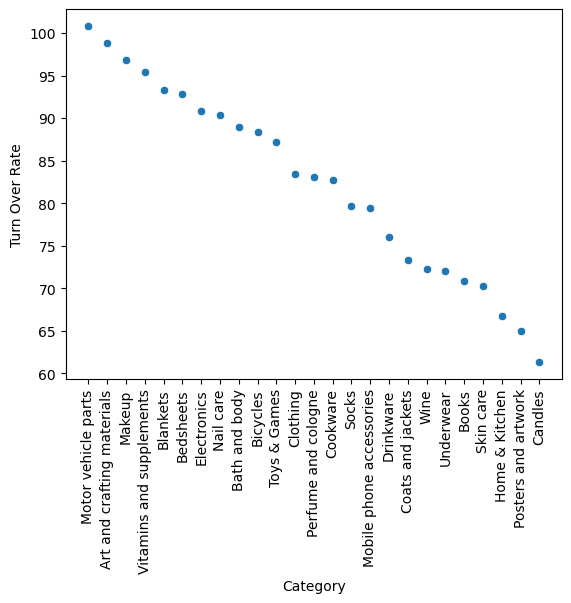

In [35]:
sns.scatterplot(data = tr, x = 'Category', y = 'Turn Over Rate')
plt.xticks(rotation = 90)
plt.show()

# Temporal Analysis

Q12: How does the sales volume change over time? Are there any noticeable trends or seasonal patterns?

In [36]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,DiscountRange,Price_range,Revenue
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08,0-10%,400-450,186544.46
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26,30-40%,200-250,313059.96
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18,30-40%,400-450,105310.80
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03,40-50%,150-200,275776.20
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08,20-30%,350-400,595267.92


In [37]:
df['year_month'] = df['DateAdded'].dt.strftime('%Y-%m')

In [38]:
sales_over_time = df.groupby('year_month')['Sales'].sum().reset_index()

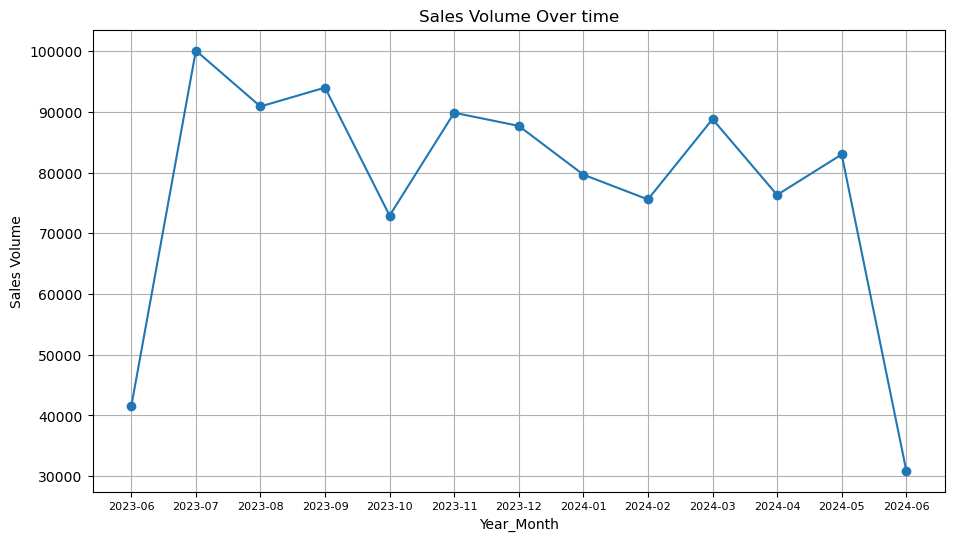

In [39]:
plt.figure(figsize=(11, 6))
plt.plot(sales_over_time['year_month'], sales_over_time['Sales'], marker='o', linestyle='-')
plt.title('Sales Volume Over time')
plt.xlabel('Year_Month')
plt.ylabel('Sales Volume')
plt.grid(True)
plt.xticks(fontsize = 8)
plt.show()

Q13: Are newer products selling better than older ones?

In [ ]:
# step 1: Calculate the Age of Each Product

In [40]:
from datetime import datetime

In [54]:
current_date = datetime.now()

In [55]:
current_date

datetime.datetime(2024, 6, 12, 14, 35, 8, 71358)

In [56]:
# Calculate the age of each product
df['ProductAgeDays'] = (current_date - df['DateAdded']).dt.days

In [ ]:
# step 2: Analyze the Relationship Between Product Age and Sales

In [63]:
age_sales_correlation = df[['ProductAgeDays', 'Sales']].corr().iloc[0, 1]
print(f'Correlation between Product Age and Sales: {age_sales_correlation}')

Correlation between Product Age and Sales: -0.002196775344960889


Ans: there is no correlation

# Discount Effectiveness

Q14 : What is the average discount given across all products?

In [64]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,DiscountRange,Price_range,Revenue,year_month,ProductAgeDays
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08,0-10%,400-450,186544.46,2023-11,217
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26,30-40%,200-250,313059.96,2023-09,260
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18,30-40%,400-450,105310.80,2023-10,238
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03,40-50%,150-200,275776.20,2023-12,192
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08,20-30%,350-400,595267.92,2023-08,309


In [73]:
print("Ans: Average discount across all products:", df['Discount'].mean() * 100)

Ans: Average discount across all products: 25.163999999999998


 # Revenue Analysis

Q15: Which products generate the most revenue?

In [95]:
top_5_products = df.groupby('ProductName')['Revenue'].sum().sort_values(ascending = False).reset_index().head(5)

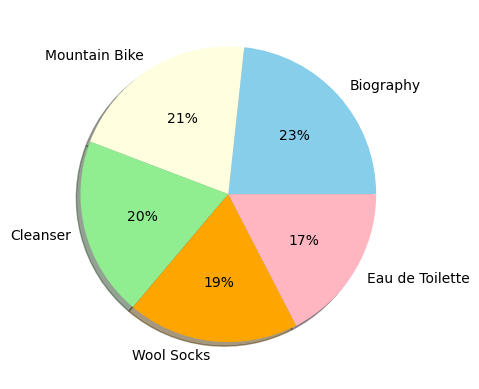

In [115]:
plt.pie(top_5_products['Revenue'], labels = top_5_products['ProductName'], autopct = '%.0f%%', shadow = True,colors = ['skyblue', 'lightyellow', 'lightgreen', 'orange','lightpink'])
plt.show()

Q16: What is the total revenue generated by the top 10% of products?

In [127]:
top_10_products = df.groupby('ProductName')['Revenue'].sum().sort_values(ascending = False).reset_index()

In [132]:
top_10_percent = top_10_products.head(10)

In [135]:
total_revenue_top_10_percent = top_10_percent['Revenue'].sum()

In [136]:
total_revenue_top_10_percent

47118758.20999999

Ans: 47118758.20999999 is the total revenue generated by the top 10% of products

In [154]:
df.groupby('Price_range')['Sales'].mean().sort_values(ascending = False).reset_index()

,Price_range,Sales
0,250-300,1090.972477
1,100-150,1079.352273
2,400-450,1060.791667
3,300-350,1037.118812
4,450-500,1006.125000
5,50-100,1002.747573
6,150-200,979.019048
7,350-400,963.186667
8,200-250,957.421488
9,10-50,906.573171
